# Data Collection

Nama : Irbah Labibah Nur Saidah

Dataset ini diambil dari : https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!gdown --id "1-9Y7fxzaY53xjetyh1OEAz5fVAjYJeUB"
!gdown --id "1Gpi4HO8oVKLqabMFfn7e3boOm1agl149"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-9Y7fxzaY53xjetyh1OEAz5fVAjYJeUB
To: /content/anime.csv
100% 936k/936k [00:00<00:00, 140MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Gpi4HO8oVKLqabMFfn7e3boOm1agl149
To: /content/rating.csv
100% 111M/111M [00:01<00:00, 77.0MB/s] 


Terdapat 2 file, yaitu anime dan rating anime.

In [ ]:
anime = pd.read_csv("/content/anime.csv")
anime_rating = pd.read_csv("/content/rating.csv")

# Data Understanding

In [ ]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Ini adalah dataset dari setiap judul anime beserta dengan genre, tipe, epidoses, rata-rata rating, dan jumlah anggota komunitas anime tersebut.

In [ ]:
anime.shape

(12294, 7)

Data ini memiliki 12294 sample dan 7 fitur. Beberapa judul anime memiliki symbol.

In [ ]:
anime_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Ini adalah dataset dari pemberian rating anime dari setiap user.

In [ ]:
anime_rating.shape

(7813737, 3)

Data ini memiliki 7813737 sample dan 3 fitur.

In [ ]:
print('Jumlah judul anime: ', len(anime.anime_id.unique()))
print('Jumlah genre anime: ', len(anime.genre.unique()))
print('Jumlah sample rating anime: ', len(anime_rating.user_id.unique()))

Jumlah judul anime:  12294
Jumlah genre anime:  3265
Jumlah sample rating anime:  73515


In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
anime_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [ ]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime = anime.dropna()

Menghapus missing value pada dataset anime.

In [ ]:
anime.shape

(12017, 7)

In [ ]:
anime_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Tidak ada missing value pada data rating anime

In [ ]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"Terdapat {dup_anime} duplikat dari {anime.shape[0]} sample pada anime dataset.")

Terdapat 0 duplikat dari 12017 sample pada anime dataset.


In [ ]:
dup_rating = anime_rating[anime_rating.duplicated()].shape[0]
print(f"Terdapat {dup_rating} duplikat dari {anime_rating.shape[0]} sample pada rating anime dataset.")

Terdapat 1 duplikat dari 7813737 sample pada rating anime dataset.


In [ ]:
# Menghapus duplikat sample dari sample rating anime dataset
anime_rating.drop_duplicates(keep='first',inplace=True)
print(f"Sample rating anime dataset sekarang adalah {anime_rating.shape[0]}.")

Sample rating anime dataset sekarang adalah 7813736.


In [ ]:
# Menghapus symbol pada judul anime
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime['name'] = anime['name'].apply(text_cleaning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## Univariate Exploratory Data Analysis

In [ ]:
anime.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,anime_id,rating,members
count,12017.00,12017.00,12017.00
mean,13638.00,6.48,18348.88
std,11231.08,1.02,55372.50
min,1.00,1.67,12.00
25%,3391.00,5.89,225.00
50%,9959.00,6.57,1552.00
75%,23729.00,7.18,9588.00
max,34519.00,10.00,1013917.00


Dataset anime memiliki rating anime terendah 1.67 dan rating tertinggi 10 dengan rata-rata 6.48. Dataset ini juga memiliki jumlah anggota komunitas anime terendah 12 dan terbanyak 1013917 dengan rata-rata 18348. Perbedaan nilai min dan max dari jumlah anggota komunitas anime cukup jauh dan hal ini wajar dikarenakan beberapa anime memang sangat populer dan beberapa tidak.

In [ ]:
anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,7813736.00,7813736.00,7813736.00
mean,36727.96,8909.07,6.14
std,20997.95,8883.95,3.73
min,1.00,1.00,-1.00
25%,18974.00,1240.00,6.00
50%,36791.00,6213.00,7.00
75%,54757.00,14093.00,9.00
max,73516.00,34519.00,10.00


Dataset rating anime memiliki rating terendah yang diberikan user pada suatu anime adalah -1 dan rating tertinggi adalah 10. Rating -1 menandakan bahwa user menonton anime, namun tidak memberikan rating.

In [ ]:
anime_rating = anime_rating[~(anime_rating.rating == -1)]

In [ ]:
anime_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,user_id,anime_id,rating
count,6337240.00,6337240.00,6337240.00
mean,36747.91,8902.87,7.81
std,21013.40,8882.00,1.57
min,1.00,1.00,1.00
25%,18984.00,1239.00,7.00
50%,36815.00,6213.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,34475.00,10.00


Sample user yang tidak memberikan rating tidak akan digunakan sehingga dihapus.

In [ ]:
anime.groupby('genre')['genre'].agg('count')

genre
Action                                                     53
Action, Adventure                                          15
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen            2
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports     1
Action, Adventure, Cars, Sci-Fi                             1
                                                           ..
Super Power, Supernatural, Vampire                          1
Supernatural                                               14
Thriller                                                    1
Vampire                                                     1
Yaoi                                                        2
Name: genre, Length: 3229, dtype: int64

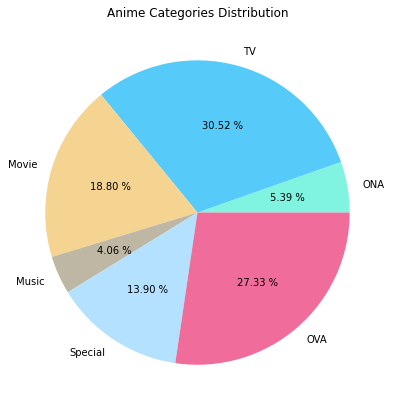

In [ ]:
# Anime Categories Distribution
from pandas.core.tools.datetimes import overload
ona = anime.loc[anime['type'] == 'ONA'].count()[0]
tv = anime.loc[anime['type'] == 'TV'].count()[0]
movie = anime.loc[anime['type'] == 'Movie'].count()[0]
music = anime.loc[anime['type'] == 'Music'].count()[0]
special = anime.loc[anime['type'] == 'Special'].count()[0]
ova = anime.loc[anime['type'] == 'OVA'].count()[0]

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize = (10,7))
plt.title('Anime Categories Distribution')
plt.pie([ona, tv, movie, music, special, ova],
        labels = labels,
        colors = colors,
        autopct = '%.2f %%'
        )
        
plt.show()

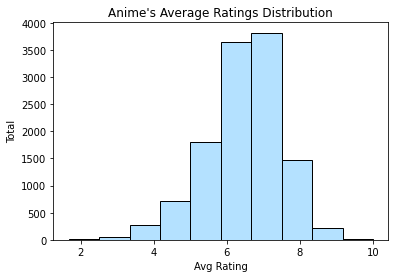

In [ ]:
# Anime's Average Ratings Distribution
plt.hist(anime.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Anime's Average Ratings Distribution")
plt.show()

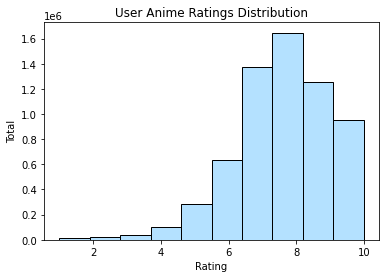

In [ ]:
# User Anime Ratings Distribution
plt.hist(anime_rating.rating, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Rating')
plt.title("User Anime Ratings Distribution")
plt.show()

## Multvarite Exploratory Data Analysis

In [ ]:
# Top 10 Anime Community
anime.sort_values(by='members', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


Menampilkan daftar anime dengan jumlah anggota community terbanyak. Misalnya, anime Death Note memiliki jumlah anggota community terbanyak, yaitu sebesar 1013917.

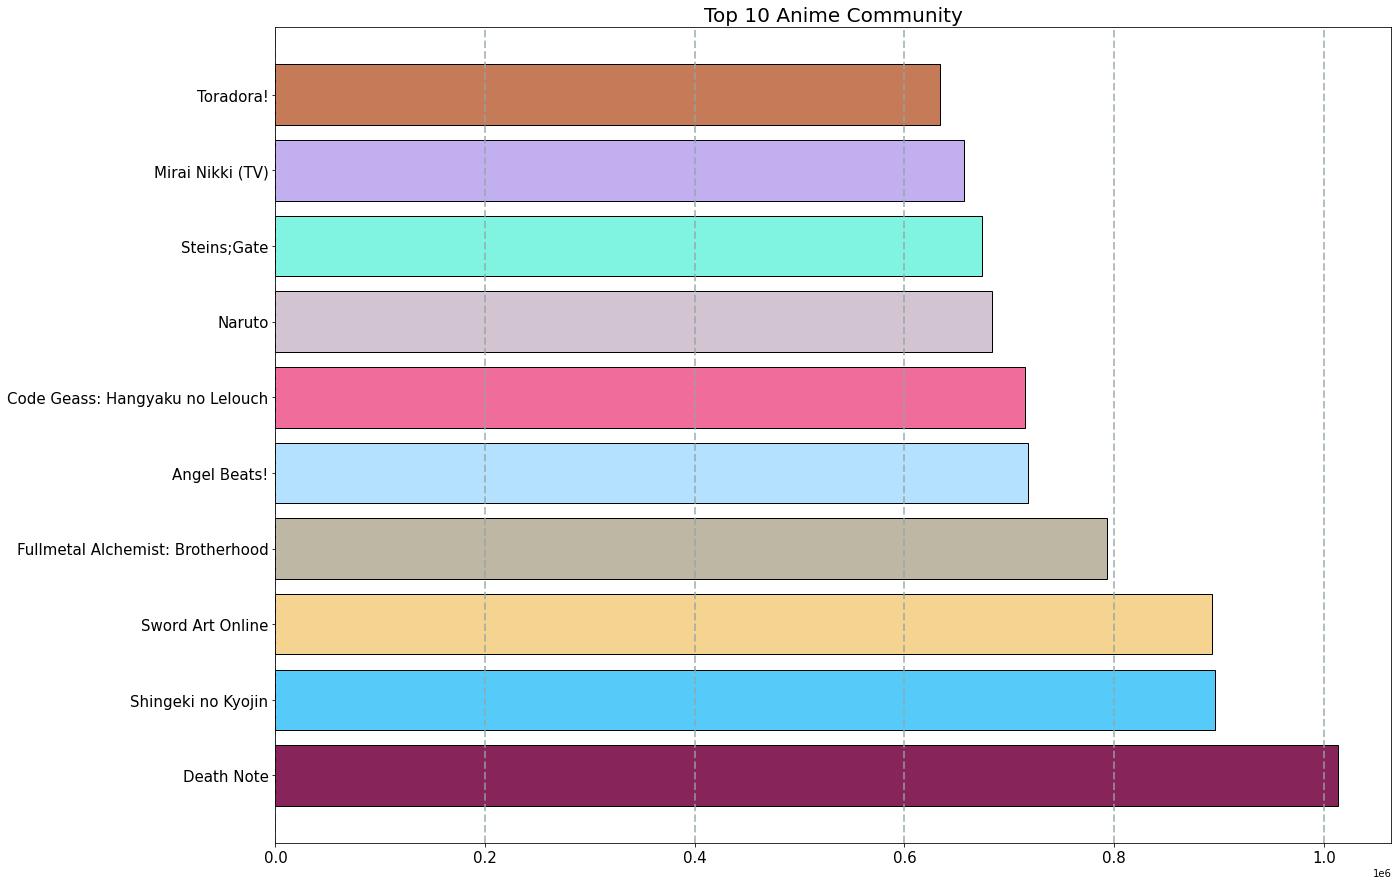

In [ ]:
# Top 10 Anime Community Plot
plt.figure(figsize = (20,15))
top10_anime = anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['members']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Community", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [ ]:
# Top 10 Anime Based on Avg Ratings
anime.sort_values(by='rating', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Menampilkan anime dengan rata-rata rating tertinggi. Misalnya, anime Taka no Tsume 8: Yoshida-kun no X-Files memiliki rata-rata rating tertinggi, yaitu 10.

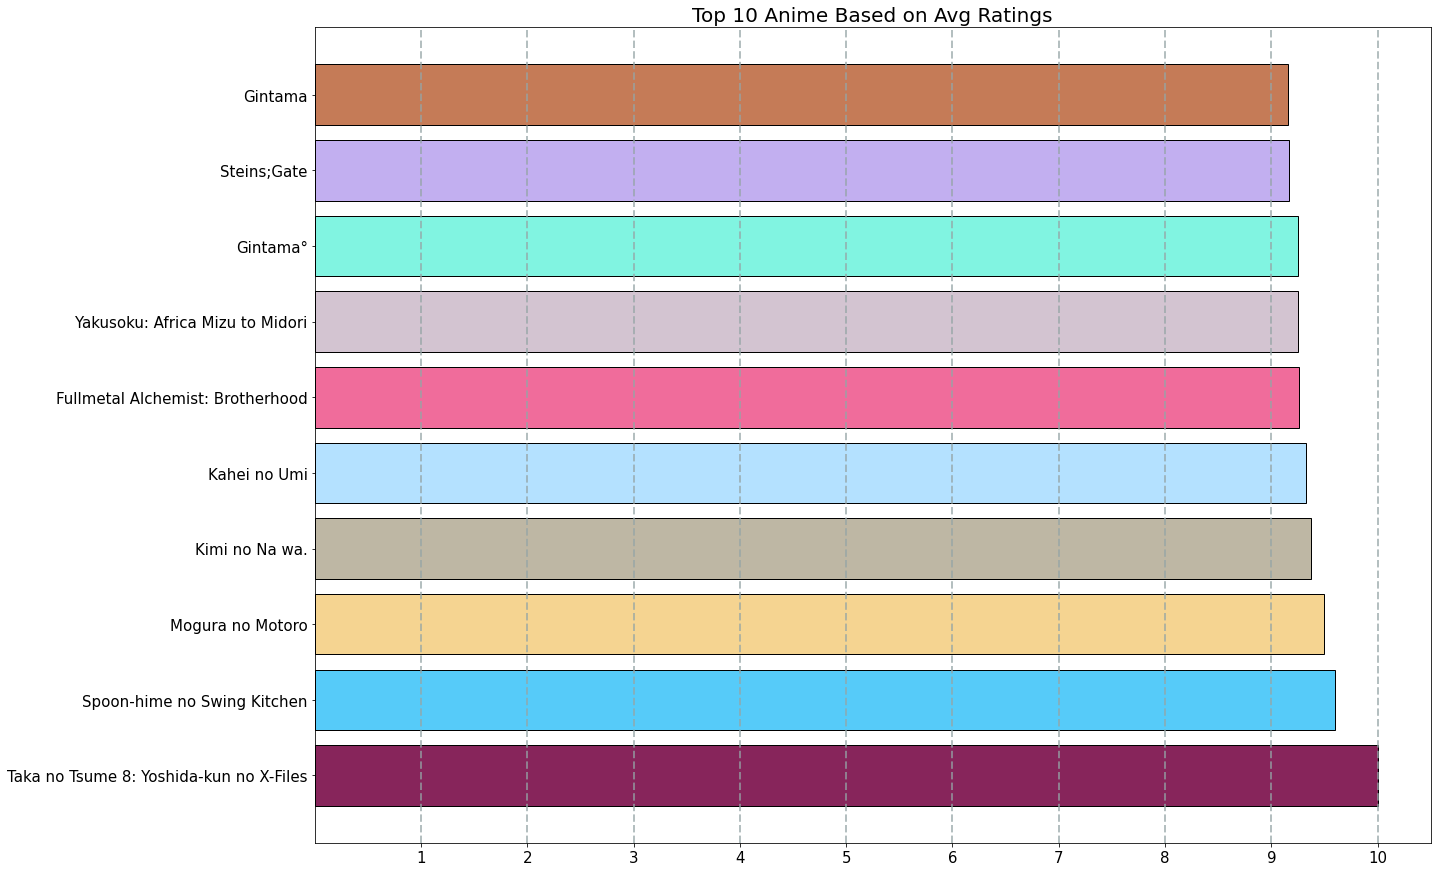

In [ ]:
# Top 10 Anime Based on Avg Ratings Plot
plt.figure(figsize = (20,15))
top10_anime = anime[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['rating']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(bins, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Based on Avg Ratings", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

In [ ]:
anime_rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [ ]:
# Count anime rating contribution
anime_rating_contribution = anime_rating.groupby('anime_id').count()
anime_rating_contribution.head(3)

,user_id,rating
anime_id,,
1,13449,13449
5,5790,5790
6,9385,9385


Anime dengan ID 1 mendapat rating sebanyak 13449 kali, anime dengan ID 5 mendapat rating sebanyak 5790 kali, dan anime dengan ID 6 mendapat rating sebanyak 9385 kali.

In [ ]:
# Menggabungkan table anime_rating_contribution dengan table anime untuk mendapat nama anime
# Top 10 anime rating contribution
anime2 = anime.drop(['rating'], axis = 'columns')
name_anime_rating_contribution = pd.merge(anime_rating_contribution, anime2, on = 'anime_id', how = 'left')
name_anime_rating_contribution.sort_values(by='rating', ascending=False).head(10)

,anime_id,user_id,rating,name,genre,type,episodes,members
1388,1535,34226,34226,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,1013917.0
6323,11757,26310,26310,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,893100.0
7059,16498,25289,25289,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,896229.0
1426,1575,24126,24126,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,715151.0
4567,6547,23565,23565,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,717796.0
201,226,23528,23528,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511.0
10,20,22071,22071,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297.0
3936,5114,21494,21494,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665.0
99,121,21332,21332,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,600384.0
2642,2904,21124,21124,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,572888.0


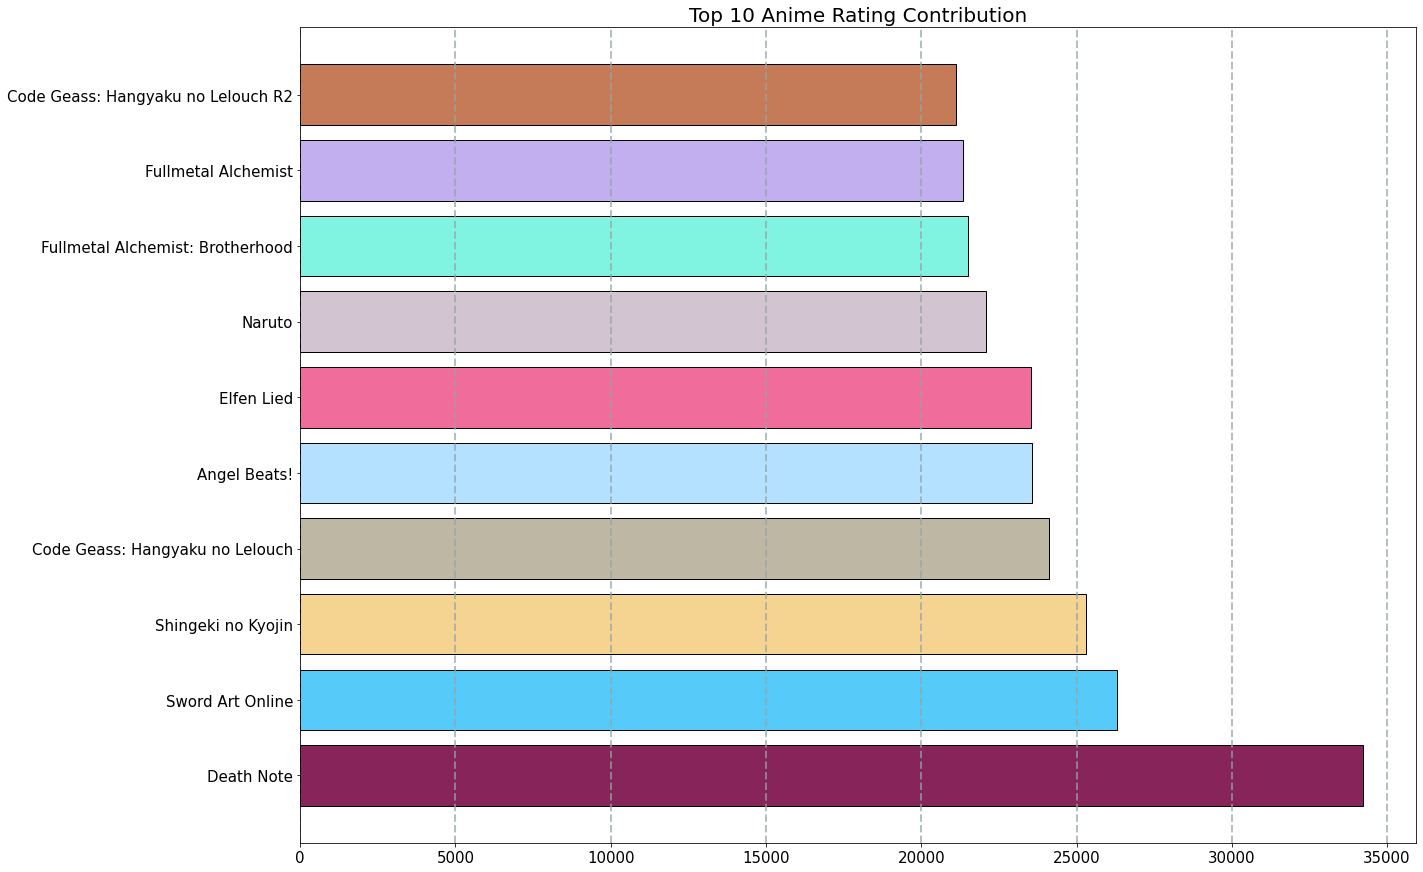

In [ ]:
# Top 10 Anime Rating Contribution Plot
plt.figure(figsize = (20,15))
top10_anime = name_anime_rating_contribution[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']


labels = top10_anime[['name']].values.flatten()
values = top10_anime[['rating']].values.flatten()

plt.barh(labels, values, color = colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Top 10 Anime Rating Contribution", fontdict = {'fontsize' : 20})
plt.show()

plt.show()

# Content Based Filtering Model & Result

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(anime['genre']) 
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [ ]:
tfidf_matrix = tf.fit_transform(anime['genre'])
tfidf_matrix.shape 

(12017, 47)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=anime.name
).sample(22, axis=1).sample(10, axis=0)

,martial,life,mystery,yaoi,of,sci,cars,yuri,demons,hentai,...,ecchi,shoujo,mecha,arts,sports,supernatural,game,drama,historical,samurai
name,,,,,,,,,,,,,,,,,,,,,
Bonjour♪Koiaji Pâtisserie,0.0,0.361584,0.0,0.0,0.361584,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.430406,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Kihei Senki Legacies,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.798990,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Power Dolls,0.0,0.000000,0.0,0.0,0.000000,0.432531,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.554741,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Minami-ke Natsuyasumi,0.0,0.545968,0.0,0.0,0.545968,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Kanamewo,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.447907,0.000000,0.0,0.0,0.397323,0.0,0.319773,0.0,0.0
Neko no Dayan: Fushigi Gekijou,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Hasu no Yousei: Bonyo Bonyo,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
RahXephon Interlude: Her and Herself/Thatness and Thereness,0.0,0.000000,0.0,0.0,0.000000,0.400703,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.404947,0.0,0.0
Himitsukessha Taka no Tsume THE PLANETARIUM: Burabura! Black Hole no Nazo,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


Dataframe ini menunjukkan matriks tf-idf untuk beberapa anime dan genre. Semakin tinggi nilai matriks menunjukkan hubungan antara anime dengan genre tersebut. Misalkan anime Asa da yo! Kaishain	merupakan genre comedy terlihat dari nilai matriks 1.0 yang didapat anime tersebut pada genre comedy

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime['name'], columns=anime['name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12017, 12017)


name,Kaichou wa Maid-sama!,Kumi to Tulip,Queens Blade: Gyokuza wo Tsugu Mono Specials,Strobe Light,Ghost Messenger Movie
name,,,,,
Kudan,0.000000,0.000000,0.447239,0.0,0.735436
Kiki to Lala no Papa to Mama ni Aitai,0.000000,0.609495,0.000000,0.0,0.000000
Hidamari Sketch Recap,0.341359,0.000000,0.000000,0.0,0.000000
Kita e: Pure Session,0.000000,0.000000,0.000000,1.0,0.000000
Tottoko Hamtarou OVA 4: Hamuchanzu no Mezase! Hamuhamu Kin Medal - Hashire! Hashire! Daisakusen,0.136548,0.411512,0.261631,0.0,0.000000
The Legend of Huainanzi,0.000000,0.000000,0.447761,0.0,0.372636
Mobile Suit Gundam MS IGLOO 2: Gravity of the Battlefront,0.000000,0.587257,0.000000,0.0,0.000000
Tenchi Muyou! Ryououki 3rd Season,0.070273,0.358310,0.117120,0.0,0.192591
Hana no Zundamaru,0.073182,0.000000,0.000000,0.0,0.000000


Dataframe ini menunjukkan nilai kesamaan antar anime. Semakin tinggi nilai cosline similarity, kedua anime akan semakin memiliki kesamaan.Misalnya, anime Anata dake Konbanwa memiliki kesamaan dengan anime Kisaku Spirit terlihat dari nilai cosine similarity 1.0 antar kedua anime tersebut.

In [ ]:
def anime_recommendations(name, similarity_data=cosine_sim_df, items=anime[['name', 'genre']], k=5):
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop name agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Fungsi anime_recommendations dibuat untuk menemukan rekomendasi anime menggunakan similarity yang telah didefinisikan sebelumnya. Fungsi ini bekerja dengan cara mengambil anime dengan similarity terbesar dari index yang ada.

In [ ]:
anime[anime.name.eq('Naruto')]

,anime_id,name,genre,type,episodes,rating,members
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [ ]:
anime_recommendations('Naruto')

,name,genre
0,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P..."


Sistem telah berhasil merekomendasikan top 5 persen anime yang mirip dengan naruto, yaitu beberapa film dan seri dari naruto itu sendiri. Jadi, jika pengguna menyunkai naruto, maka sistem dapat merekomendasikan seri atau movie naruto lainnya.